In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special

In [279]:
def f(x):
    if x <= 0.5:
        return np.sin(x*3)
    else:
        return np.sin((1-x)*3)


In [3]:
def f(x):
    if x < 0.25:
        return x
    elif x >= 0.25 and x <= 0.5:
        return x+0.5
    else:
        return 1-(x-0.5)*2

In [4]:
def char_func(x, z):
    if x <= z:
        return 1
    else:
        return 0

In [5]:
def heat_kernel(x, y, gamma, d):
    return ((2*np.pi)**(-d/2))*(gamma**(-d))*np.exp((-(x-y)**2)/(2*gamma**2))

In [6]:
def char_moll(x, y, gamma):
    if np.abs(x-y) <= gamma:
        return 1/(2*gamma)
    else:
        return 0


In [42]:
N = 5000
grid = np.arange(0,1,1/N)#datagrid


In [43]:

matrix = np.zeros((N, N))

for i in range(0,N):
    for j in range(0,N):
        if i < j:
            matrix[i,j] = grid[i]
        else:
            matrix[i,j] = grid[j]
        

In [44]:
gamma = 0.01
#calculation of the right hand side of the normal equation
n = 100
grid_ = np.arange(0,1,1/n)
norm_dat = np.zeros((N,n))
for j in range(0,n):#size of the recon_grid
    tmp = np.zeros((N))
    for i in range(0,N):
        if grid_[j] < grid[i]:
            if grid_[j] > gamma and (grid[i]-grid_[j]) < gamma:
                tmp[i] = (1/(2*gamma))*(gamma+(grid[i]-grid_[j]))
            elif grid_[j] > gamma and (grid[i]-grid_[j]) >= gamma:
                tmp[i] = 1
            elif grid_[j] <= gamma and (grid[i]-grid_[j]) < gamma:
                tmp[i] = (1/(2*gamma))*(grid_[j]+(grid[i]-grid_[j]))
            else:
                tmp[i] = (1/(2*gamma))*(grid_[j]+gamma)
        elif grid_[j] >= grid[i]:
            if grid[j] > gamma:
                tmp[i] = (1/(2*gamma))*(gamma-(grid_[j]-grid[i]))
            elif grid[j] <= gamma:
                tmp[i] = (1/(2*gamma))*(grid_[j]-(grid_[j]-grid[i]))
    norm_dat[:,j] = tmp

In [45]:
theta = 0.001
recon_kernel_grid = np.zeros((N,n))

recon_kernel_grid = np.linalg.solve(matrix+theta*np.eye(N), norm_dat)


In [ ]:
epsilon = []
for i in range(0,N):
    if i <= N/2:
        epsilon.append((np.random.rand(1,1)-0.5)*2*0.05*(2*i/N))
    else:
        epsilon.append((np.random.rand(1,1)-0.5)*2*0.05*(2*((N/2)-i)/N))

In [46]:
epsilon = []
epsilon = (np.random.rand(1,N)-0.5)*2*0.00

In [48]:
data = []
for i in range(0,N):
    data.append(integrate.quad(lambda x: f(x), 0, grid[i])[0])
data = np.array(data)
epsilon = np.array(epsilon)
epsilon = np.reshape(epsilon, (N))
g = data+epsilon
g = np.reshape(g, (N,1))

/home/darius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:

solution_grid = np.transpose(g)@recon_kernel_grid



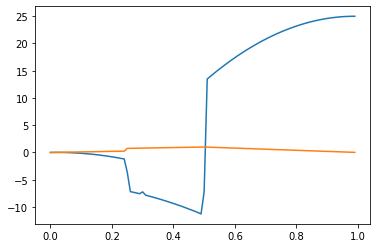

In [50]:
import matplotlib.pyplot as plt
solution_grid = np.reshape(solution_grid, (n))
plt.plot(grid_, solution_grid)
true_function = []
for val in grid_:
    true_function.append(f(val))
plt.plot(grid_, true_function)